# Global Classrooms: Analyzing International Student Trends in Canada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/syedabdulshameer/international-students-in-canada/data

Knowing the data

In [2]:
df1=pd.read_csv("Internation_students_Canada.csv")
df1.head()

,Country of Citizenship,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,95,115,95,80,95,90,80,170,140
1,Albania,115,165,185,245,375,250,305,345,545
2,Algeria,1060,845,1020,1490,2690,2170,3165,5360,7180
3,Andorra,0,0,0,0,0,0,10,5,0
4,Angola,65,80,40,25,120,30,50,75,65


In [3]:
df1.shape

(217, 10)

In [4]:
df1.dtypes

Country of Citizenship    object
2015                       int64
2016                       int64
2017                       int64
2018                       int64
2019                       int64
2020                       int64
2021                       int64
2022                       int64
2023                       int64
dtype: object

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country of Citizenship  217 non-null    object
 1   2015                    217 non-null    int64 
 2   2016                    217 non-null    int64 
 3   2017                    217 non-null    int64 
 4   2018                    217 non-null    int64 
 5   2019                    217 non-null    int64 
 6   2020                    217 non-null    int64 
 7   2021                    217 non-null    int64 
 8   2022                    217 non-null    int64 
 9   2023                    217 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 17.1+ KB


In [6]:
df1.isnull().sum()

Country of Citizenship    0
2015                      0
2016                      0
2017                      0
2018                      0
2019                      0
2020                      0
2021                      0
2022                      0
2023                      0
dtype: int64

In [7]:
df1.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1047.649770,1268.917051,1510.967742,1692.741935,1898.986175,1245.668203,2121.059908,2616.036866,2740.414747
std,5362.640744,6741.540436,8403.593118,9729.000854,11360.882179,7180.221219,12670.061927,16425.316706,15791.033191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,10.000000,10.000000,10.000000,10.000000,5.000000,15.000000,15.000000,20.000000
50%,85.000000,100.000000,105.000000,105.000000,120.000000,70.000000,135.000000,145.000000,145.000000
75%,335.000000,420.000000,445.000000,475.000000,540.000000,415.000000,630.000000,665.000000,775.000000
max,68350.000000,80525.000000,87290.000000,109290.000000,140250.000000,84590.000000,174595.000000,232640.000000,220035.000000


In [8]:
df1['Country of Citizenship'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahama Islands, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin, Republic of', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Sin Eustatius And Saba', 'Bosnia-Herzegovina',
       'Botswana, Republic of', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina-Faso', 'Burundi', 'Cambodia',
       'Cameroon, Federal Republic of', 'Cape Verde Islands',
       'Cayman Islands', 'Central African Republic', 'Chad, Republic of',
       'Chile', "China, People's Republic of", 'Colombia', 'Comoros',
       'Congo, Democratic Republic of the',
       "Congo, People's Republic of the", 'Costa Rica', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti, Republic of', 'Dominica', 'Dominican Republic',
       'East Timor, Democratic Re

Insights

In [12]:
top_countries_per_year = {}

for year in df1.columns[1:]:
    # Sort the data for the current year
    sorted_df = df1[['Country of Citizenship', year]].sort_values(by=year, ascending=False)
    # Get the top 3 countries for the current year
    top_countries = sorted_df.head(3)
    top_countries_per_year[year] = top_countries

for year, top_countries in top_countries_per_year.items():
    print(f"Top 3 countries for {year}:")
    print(top_countries)
    print()


Top 3 countries for 2015:
         Country of Citizenship   2015
39  China, People's Republic of  68350
85                        India  32465
99           Korea, Republic of  15870

Top 3 countries for 2016:
         Country of Citizenship   2016
39  China, People's Republic of  80525
85                        India  53450
99           Korea, Republic of  17230

Top 3 countries for 2017:
         Country of Citizenship   2017
39  China, People's Republic of  87290
85                        India  84290
99           Korea, Republic of  18010

Top 3 countries for 2018:
         Country of Citizenship    2018
85                        India  109290
39  China, People's Republic of   89200
99           Korea, Republic of   18010

Top 3 countries for 2019:
         Country of Citizenship    2019
85                        India  140250
39  China, People's Republic of   87675
99           Korea, Republic of   17915

Top 3 countries for 2020:
         Country of Citizenship   2020
85          

In [13]:
def plot(country):
    # Filter the data for the selected country
    country_data = df1[df1['Country of Citizenship'] == country]

    # Extract years and student counts
    years = df1.columns[1:]
    student_counts = country_data.iloc[:, 1:]

    # Plot the trend
    plt.plot(years, student_counts.values.flatten(), marker='o')
    plt.title(f"Number of students from {country} per year")
    plt.xlabel("Year")
    plt.ylabel("Number of students")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


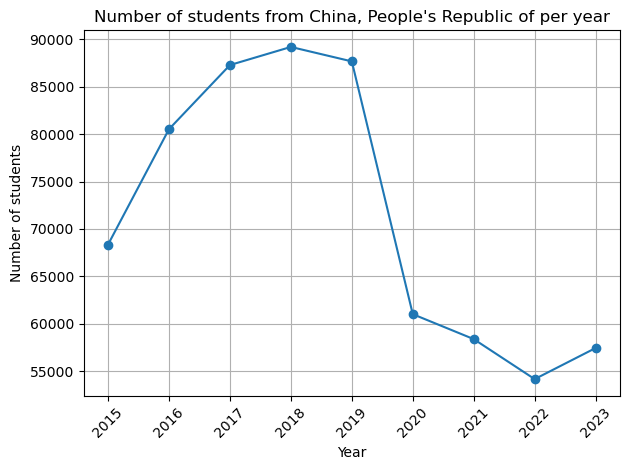

In [14]:
plot("China, People's Republic of")

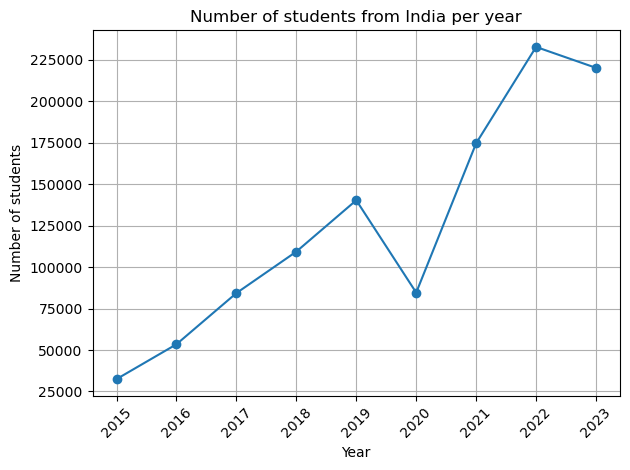

In [15]:
plot("India")

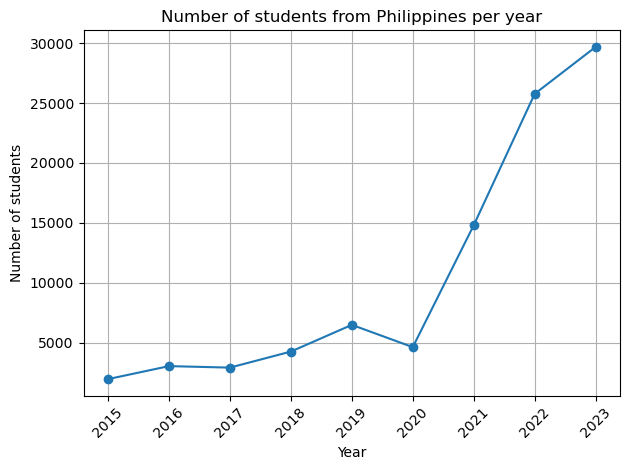

In [16]:
plot("Philippines")

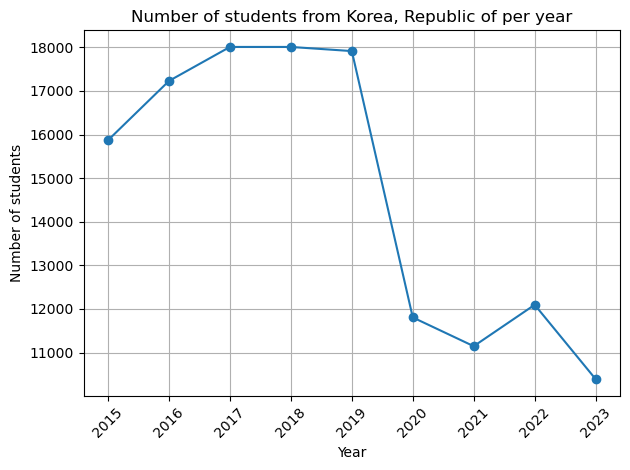

In [17]:
plot("Korea, Republic of")

 Key Points

> The years 2015 to 2017 witnessed a dominant trend in international student enrollment from China.  

> From 2018 to 2023, Indian students emerged as the top performers in terms of enrollment numbers.  

> Notably, the highest influx of international students occurred in 2022, with India leading the cohort.  

> A discernible shift in enrollment trends was observed, with a decline in students from South Korea and a concurrent rise in admissions from Nigeria and the Philippines.

# Data based on Study Programs


In [18]:
df2=pd.read_csv("International_Students_Study_level.csv")
df2.head()

,Province/Territory,study level,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Newfoundland and Labrador,Secondary or less,180,310,335,330,375,175,525,840,850
1,Newfoundland and Labrador,Post Secondary,1375,1595,1760,1835,2135,1180,2735,3010,3220
2,Newfoundland and Labrador,Other Studies,90,85,150,145,115,35,40,50,75
3,Newfoundland and Labrador,Education level not stated,0,0,0,0,0,0,0,0,0
4,Prince Edward Island,Secondary or less,175,205,270,450,400,290,475,590,750


 Knowing the data

In [19]:
df2.shape

(50, 11)

In [20]:
df2.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,4442.100000,5353.500000,6395.000000,7158.700000,8056.600000,5171.800000,8881.10000,10906.200000,13567.700000
std,10889.139323,13997.845361,17293.011919,19585.287424,23029.362257,15073.090151,27698.22418,35723.787944,44095.079671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6.250000,10.000000,6.250000,5.000000,11.250000,1.250000,10.00000,6.250000,15.000000
50%,250.000000,290.000000,382.500000,552.500000,450.000000,280.000000,500.00000,715.000000,780.000000
75%,2661.250000,3057.500000,3476.250000,3963.750000,4658.750000,3048.750000,4861.25000,6230.000000,8332.500000
max,64090.000000,85970.000000,107750.000000,122975.000000,146570.000000,93170.000000,180575.00000,238590.000000,295590.000000


In [21]:
df2.dtypes

Province/Territory    object
study level           object
2015                   int64
2016                   int64
2017                   int64
2018                   int64
2019                   int64
2020                   int64
2021                   int64
2022                   int64
2023                   int64
dtype: object

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Province/Territory  50 non-null     object
 1   study level         50 non-null     object
 2   2015                50 non-null     int64 
 3   2016                50 non-null     int64 
 4   2017                50 non-null     int64 
 5   2018                50 non-null     int64 
 6   2019                50 non-null     int64 
 7   2020                50 non-null     int64 
 8   2021                50 non-null     int64 
 9   2022                50 non-null     int64 
 10  2023                50 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 4.4+ KB


In [23]:
df2.isnull().sum()

Province/Territory    0
study level           0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
2023                  0
dtype: int64

In [24]:
df2['Province/Territory'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories',
       'Nunavut'], dtype=object)

In [25]:
df2['study level'].unique()

array(['Secondary or less', 'Post Secondary', 'Other Studies',
       'Education level not stated'], dtype=object)

Insights

In [26]:
df2.columns[2:]

Index(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')

In [27]:
for year in df2.columns[2:]:
    sorted_df = df2[["Province/Territory","study level", year]]
    print(sorted_df)
    print()
    

           Province/Territory                 study level   2015
0   Newfoundland and Labrador           Secondary or less    180
1   Newfoundland and Labrador              Post Secondary   1375
2   Newfoundland and Labrador               Other Studies     90
3   Newfoundland and Labrador  Education level not stated      0
4        Prince Edward Island           Secondary or less    175
5        Prince Edward Island              Post Secondary    500
6        Prince Edward Island               Other Studies    235
7        Prince Edward Island  Education level not stated      0
8                 Nova Scotia           Secondary or less   1215
9                 Nova Scotia              Post Secondary   4215
10                Nova Scotia               Other Studies    865
11                Nova Scotia  Education level not stated      0
12              New Brunswick           Secondary or less    415
13              New Brunswick              Post Secondary   1785
14              New Bruns

In [28]:
# Notable numbers from each year

for year in df2.columns[2:]:
    sorted_df = df2[["Province/Territory","study level", year]].sort_values(by=year, ascending=False)
    print(sorted_df.head(3))
    print()

   Province/Territory     study level   2015
21            Ontario  Post Secondary  64090
37   British Columbia  Post Secondary  30260
17             Quebec  Post Secondary  24555

   Province/Territory     study level   2016
21            Ontario  Post Secondary  85970
37   British Columbia  Post Secondary  37495
17             Quebec  Post Secondary  26540

   Province/Territory     study level    2017
21            Ontario  Post Secondary  107750
37   British Columbia  Post Secondary   46030
17             Quebec  Post Secondary   29515

   Province/Territory     study level    2018
21            Ontario  Post Secondary  122975
37   British Columbia  Post Secondary   51615
17             Quebec  Post Secondary   34585

   Province/Territory     study level    2019
21            Ontario  Post Secondary  146570
37   British Columbia  Post Secondary   56780
17             Quebec  Post Secondary   44885

   Province/Territory     study level   2020
21            Ontario  Post Secondary 

In [29]:
def plot_province(province):
    province_data = df2[df2['Province/Territory'] == province]
    study_levels = province_data['study level']
    years = df2.columns[2:]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for level in study_levels:
        level_data = province_data[province_data['study level'] == level].iloc[:, 2:]
        ax.plot(years, level_data.values.flatten(), marker='o', label=level)
    
    ax.set_title(f"Number of Students in Different Study Levels in {province}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Students")
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Enter the province/territory: Ontario


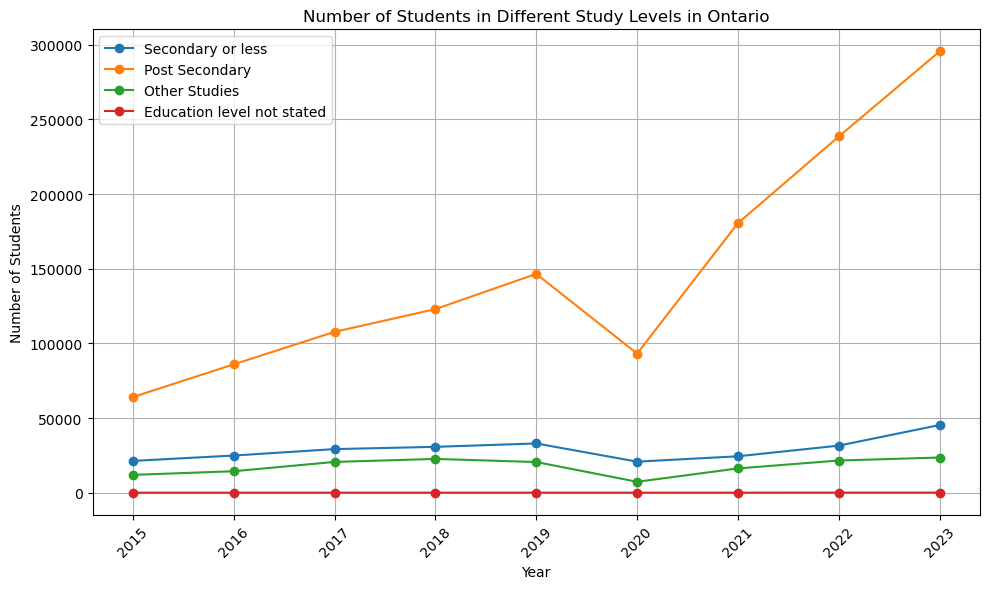

In [30]:
province_input = input("Enter the province/territory: ")
plot_province(province_input)

Enter the province/territory: Quebec


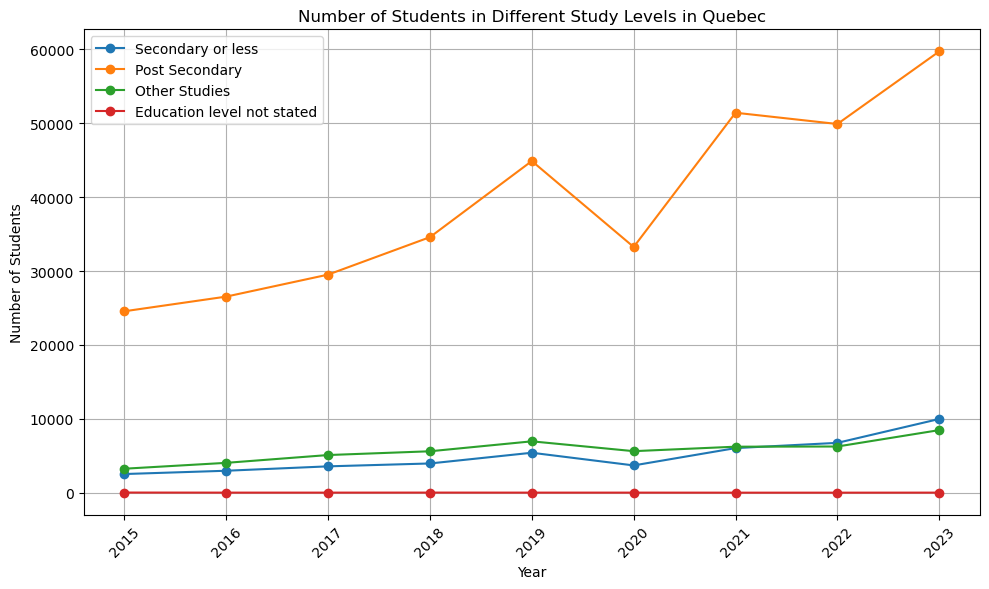

In [31]:
province_input = input("Enter the province/territory: ")
plot_province(province_input)

key Points

> Ontario, Quebec, and British Columbia emerged as favored destinations among international students, indicating their attractiveness as educational hubs.    

> Post Secondary courses garnered the highest preference among international students, reflecting their inclination towards higher education pathways. 

# Data Based on Gender ratio 

In [32]:
df3=pd.read_csv("Internation_students_Province_Canada.csv")
df3.head()

,Province/territory,Sex,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Newfoundland and Labrador,Female,570,745,865,900,"1,050",530,"1,270","1,600","1,535"
1,Newfoundland and Labrador,Male,"1,075","1,240","1,370","1,400","1,565",850,"2,025","2,290","2,205"
2,Newfoundland and Labrador,Another gender,0,0,0,0,0,0,0,0,0
3,Prince Edward Island,Female,425,525,670,765,885,615,905,"1,120","1,360"
4,Prince Edward Island,Male,485,650,780,"1,090","1,010",680,985,"1,280","1,435"


 Knowing the Data

In [33]:
df3.shape

(44, 11)

In [34]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Province/territory  44 non-null     object
 1   Sex                 43 non-null     object
 2   2015                44 non-null     object
 3   2016                44 non-null     object
 4   2017                44 non-null     object
 5   2018                44 non-null     object
 6   2019                44 non-null     object
 7   2020                44 non-null     object
 8   2021                44 non-null     object
 9   2022                44 non-null     object
 10  2023                44 non-null     object
dtypes: object(11)
memory usage: 3.9+ KB


In [35]:
df3.isnull().sum()

Province/territory    0
Sex                   1
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
2023                  0
dtype: int64

In [37]:
df3=df3.dropna()
df3.isnull().sum()

Province/territory    0
Sex                   0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
2023                  0
dtype: int64

In [38]:
df3.dtypes

Province/territory    object
Sex                   object
2015                  object
2016                  object
2017                  object
2018                  object
2019                  object
2020                  object
2021                  object
2022                  object
2023                  object
dtype: object

In [45]:
cols_to_convert = df3.columns[2:]
df3[cols_to_convert] = df3[cols_to_convert].replace(',', '', regex=True).astype(int)

In [46]:
df3.dtypes

Province/territory    object
Sex                   object
2015                   int64
2016                   int64
2017                   int64
2018                   int64
2019                   int64
2020                   int64
2021                   int64
2022                   int64
2023                   int64
dtype: object

In [47]:
df3.head()

,Province/territory,Sex,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Newfoundland and Labrador,Female,570,745,865,900,1050,530,1270,1600,1535
1,Newfoundland and Labrador,Male,1075,1240,1370,1400,1565,850,2025,2290,2205
2,Newfoundland and Labrador,Another gender,0,0,0,0,0,0,0,0,0
3,Prince Edward Island,Female,425,525,670,765,885,615,905,1120,1360
4,Prince Edward Island,Male,485,650,780,1090,1010,680,985,1280,1435


In [67]:
#checked the dataset before import and found columns with all values as 0
zeros = df3.iloc[:, 2:].eq(0).all(axis=1)
df_new = df3[~zeros]


In [69]:
df_new

,Province/territory,Sex,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Newfoundland and Labrador,Female,570,745,865,900,1050,530,1270,1600,1535
1,Newfoundland and Labrador,Male,1075,1240,1370,1400,1565,850,2025,2290,2205
3,Prince Edward Island,Female,425,525,670,765,885,615,905,1120,1360
4,Prince Edward Island,Male,485,650,780,1090,1010,680,985,1280,1435
6,Nova Scotia,Female,2715,3185,3500,4445,4605,2315,4405,6235,6905
7,Nova Scotia,Male,3535,3840,4270,5445,5740,2705,5550,6880,7405
10,New Brunswick,Female,880,1070,1150,1550,1820,945,2655,3535,4480
11,New Brunswick,Male,1440,1550,1760,2180,2545,1320,3270,4105,5315
14,Quebec,Female,13605,15180,17645,19855,25060,18570,28805,28900,31285
15,Quebec,Male,16600,18215,20315,24130,32010,23785,34650,33730,37690


Insights

In [73]:
for year in df_new.columns[2:]:
    sorted_df = df_new[["Province/territory","Sex", year]]
    print(sorted_df)
    print()

           Province/territory                Sex   2015
0   Newfoundland and Labrador             Female    570
1   Newfoundland and Labrador               Male   1075
3       Prince Edward Island              Female    425
4       Prince Edward Island                Male    485
6                 Nova Scotia             Female   2715
7                 Nova Scotia               Male   3535
10              New Brunswick             Female    880
11              New Brunswick               Male   1440
14                     Quebec             Female  13605
15                     Quebec               Male  16600
16                     Quebec     Another gender      0
17                     Quebec  Gender not stated      0
18                    Ontario             Female  42625
19                    Ontario               Male  53460
20                    Ontario     Another gender      0
21                    Ontario  Gender not stated      0
22                   Manitoba             Female

In [76]:
def visualize_sex_ratio(province):
    province_data = df_new[df_new['Province/territory'] == province]
    years = province_data.columns[2:]
    sex_counts = province_data.groupby('Sex')[years].sum()

    # Calculate ratio
    sex_ratio = sex_counts.div(sex_counts.sum(axis=0), axis=1)
    
    sex_ratio.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Sex Ratio per Year in {province}")
    plt.xlabel("Year")
    plt.ylabel("Sex Ratio")
    plt.legend(title='Sex')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Enter the province/territory: Manitoba


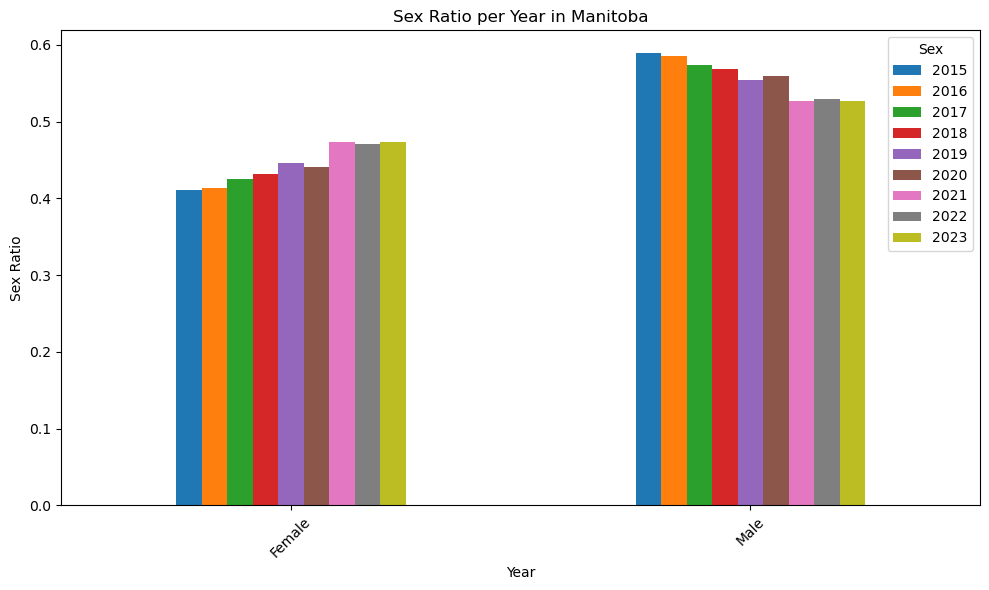

In [77]:
province_input = input("Enter the province/territory: ")
visualize_sex_ratio(province_input)

Enter the province/territory: Alberta


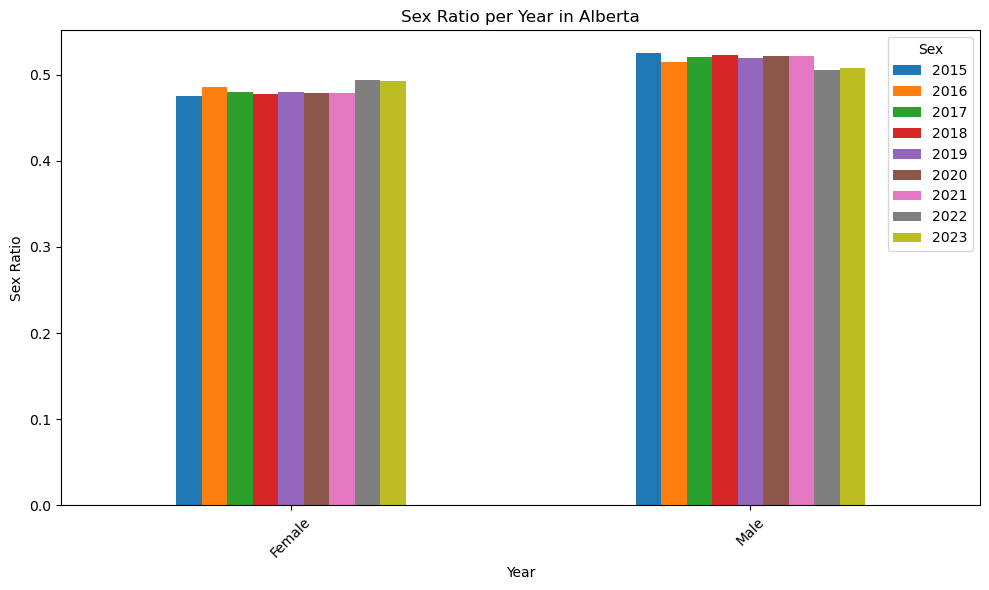

In [79]:
province_input = input("Enter the province/territory: ")
visualize_sex_ratio(province_input)

Key points

> The year 2023 marked a milestone in incoming student admissions, reaching an all-time high.

> Across all provinces, a slight predominance of male students was observed, Quebec displayed
 a noteworthy balance between male and female student enrollments.